# RNN Cell Size Analysis

This notebook analyzes the effect of different RNN cell sizes on model performance.

## Import Library

In [141]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, TextVectorization, Embedding
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

## Preparation

### Load Data from CSV

In [142]:
train_df = pd.read_csv('../../../data/nusax/train.csv')
valid_df = pd.read_csv('../../../data/nusax/valid.csv')

### Preprocess Data

In [143]:
max_tokens = 5000
max_sequence_length = 54
text_vectorizer = TextVectorization(
    max_tokens=max_tokens,
    output_sequence_length=max_sequence_length,
    standardize='lower_and_strip_punctuation'
)

text_vectorizer.adapt(train_df['text'].values)

label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
train_df['label'] = train_df['label'].map(label_map)
valid_df['label'] = valid_df['label'].map(label_map)

x_train = text_vectorizer(train_df['text'])
y_train = train_df['label']
x_val = text_vectorizer(valid_df['text'])
y_val = valid_df['label']

## Model Training

Variants:
1. 1 RNN Layer
2. 2 RNN Layer
3. 3 RNN Layer

### Variant 1: 1 RNN Layer

In [144]:
model_1 = Sequential([
    Embedding(max_tokens, 100, input_length=max_sequence_length),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/30


/Users/maulvizm/Education/Machine Learning/if3270-tubes-2/.venv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.3588 - loss: 1.0946 - val_accuracy: 0.4000 - val_loss: 1.0329
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6391 - loss: 0.8905 - val_accuracy: 0.4900 - val_loss: 1.0227
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8294 - loss: 0.6615 - val_accuracy: 0.4700 - val_loss: 1.2340
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8247 - loss: 0.5245 - val_accuracy: 0.4500 - val_loss: 1.3431
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9387 - loss: 0.2938 - val_accuracy: 0.4800 - val_loss: 1.5170
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9748 - loss: 0.1732 - val_accuracy: 0.4600 - val_loss: 1.9967
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9879 - loss: 0.1070 - val_accuracy: 0.4000 - val_loss: 2.3675
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9859 - loss: 0.0937 - val_accuracy: 0.4200 - val_loss: 2.3654
Epoch 9/30
8/8 ━━━

### Variant 2: 2 RNN Layer

In [145]:
model_2 = Sequential([
    Embedding(max_tokens, 100, input_length=max_sequence_length),
    SimpleRNN(64, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4139 - loss: 1.1491 - val_accuracy: 0.5400 - val_loss: 0.9872
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5079 - loss: 0.9609 - val_accuracy: 0.5100 - val_loss: 1.0317
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6238 - loss: 0.8193 - val_accuracy: 0.4300 - val_loss: 1.1867
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9178 - loss: 0.3778 - val_accuracy: 0.4500 - val_loss: 1.1983
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9930 - loss: 0.1111 - val_accuracy: 0.4900 - val_loss: 1.1804
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0382 - val_accuracy: 0.5100 - val_loss: 1.4118
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0177 - val_accuracy: 0.4400 - val_loss: 1.5087
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 0.4700 - val_loss: 1.5763


### Varian 3: 128 Cells per layer

In [146]:
model_3 = Sequential([
    Embedding(max_tokens, 100, input_length=max_sequence_length),
    SimpleRNN(64, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(64, return_sequences=True),
    Dropout(0.2),
    SimpleRNN(64, return_sequences=False),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_3.fit(
    x_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3758 - loss: 1.2541 - val_accuracy: 0.4400 - val_loss: 1.0388
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5064 - loss: 1.0227 - val_accuracy: 0.4700 - val_loss: 1.1102
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7307 - loss: 0.6985 - val_accuracy: 0.4500 - val_loss: 1.2294
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8612 - loss: 0.3871 - val_accuracy: 0.4800 - val_loss: 1.2687
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9722 - loss: 0.1420 - val_accuracy: 0.4800 - val_loss: 1.5974
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0464 - val_accuracy: 0.5600 - val_loss: 1.5202
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0172 - val_accuracy: 0.5100 - val_loss: 1.7992
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0108 - val_accuracy: 0.5000 - val_loss: 1.7954


## Model Evaluation

In [147]:
def evaluate_model(model, x_val, y_val, history):
    y_pred = model.predict(x_val)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_val, y_pred_classes, average='macro')
    print(classification_report(y_val, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

### Evaluate Training Loss and Validation Loss for Each Model

#### Model 1


Evaluating Model 1 (1 RNN Layer):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

           0       0.58      0.84      0.69        38
           1       0.40      0.33      0.36        24
           2       0.40      0.26      0.32        38

    accuracy                           0.50       100
   macro avg       0.46      0.48      0.46       100
weighted avg       0.47      0.50      0.47       100

Macro F1-score: 0.4564


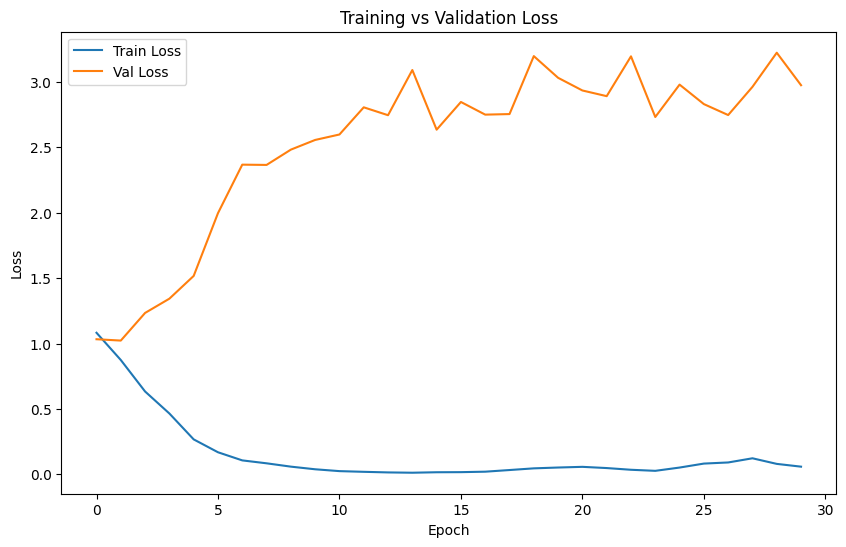

In [148]:
print("\nEvaluating Model 1 (1 RNN Layer):")
f1_1 = evaluate_model(model_1, x_val, y_val, history_1)

#### Model 2


Evaluating Model 2 (2 RNN Layer):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
              precision    recall  f1-score   support

           0       0.58      0.58      0.58        38
           1       0.38      0.50      0.43        24
           2       0.47      0.37      0.41        38

    accuracy                           0.48       100
   macro avg       0.47      0.48      0.47       100
weighted avg       0.49      0.48      0.48       100

Macro F1-score: 0.4731


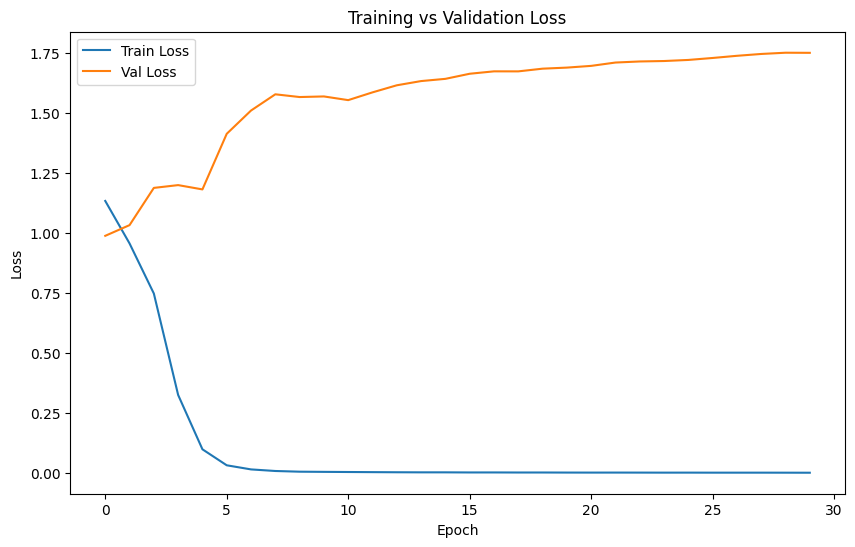

In [149]:
print("\nEvaluating Model 2 (2 RNN Layer):")
f1_2 = evaluate_model(model_2, x_val, y_val, history_2)

#### Model 3


Evaluating Model 3 (3 RNN Layer):
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
              precision    recall  f1-score   support

           0       0.68      0.74      0.71        38
           1       0.43      0.54      0.48        24
           2       0.45      0.34      0.39        38

    accuracy                           0.54       100
   macro avg       0.52      0.54      0.53       100
weighted avg       0.53      0.54      0.53       100

Macro F1-score: 0.5261


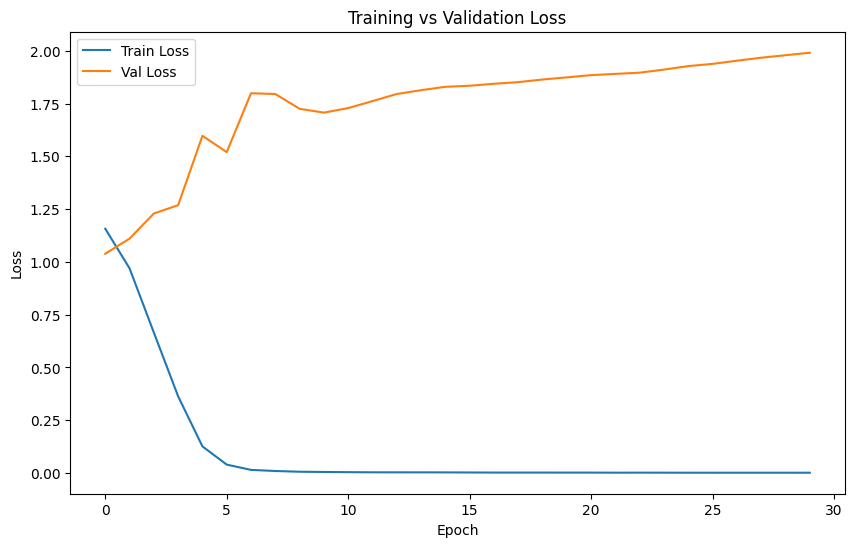

In [150]:
print("\nEvaluating Model 3 (3 RNN Layer):")
f1_3 = evaluate_model(model_3, x_val, y_val, history_3)

### Validation Loss Comparison

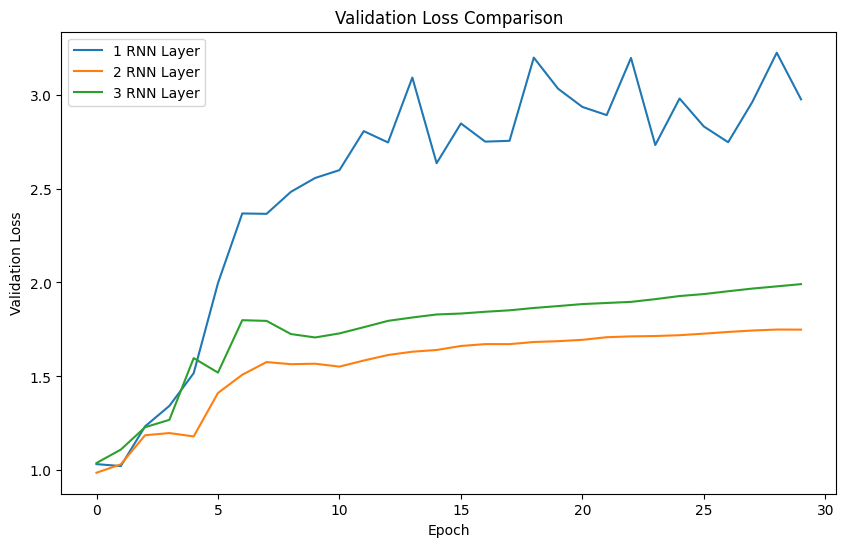

In [151]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['val_loss'], label='1 RNN Layer')
plt.plot(history_2.history['val_loss'], label='2 RNN Layer')
plt.plot(history_3.history['val_loss'], label='3 RNN Layer')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

### Training Loss Comparison

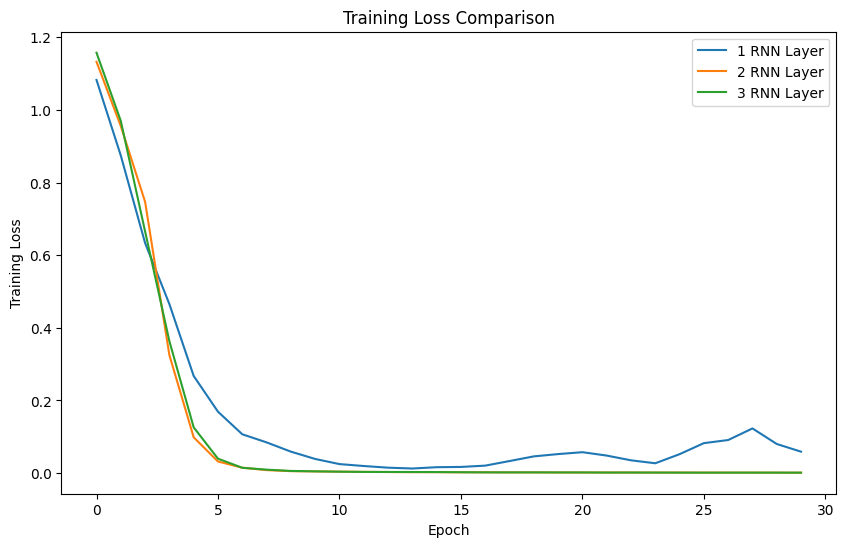

In [152]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['loss'], label='1 RNN Layer')
plt.plot(history_2.history['loss'], label='2 RNN Layer')
plt.plot(history_3.history['loss'], label='3 RNN Layer')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend()
plt.show()

### Accuracy Comparison

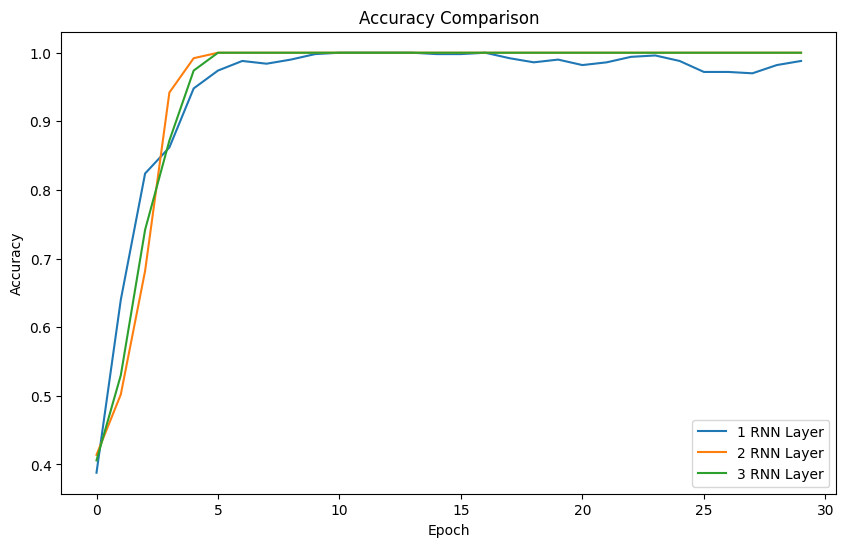

In [153]:
plt.figure(figsize=(10, 6))
plt.plot(history_1.history['accuracy'], label='1 RNN Layer')
plt.plot(history_2.history['accuracy'], label='2 RNN Layer')
plt.plot(history_3.history['accuracy'], label='3 RNN Layer')
plt.title('Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### F1 Score Comparison

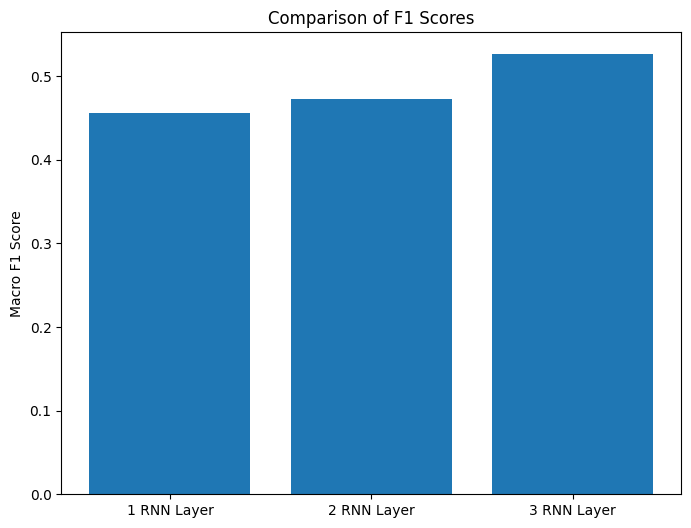

In [154]:
plt.figure(figsize=(8, 6))
plt.bar(['1 RNN Layer', '2 RNN Layer', '3 RNN Layer'], [f1_1, f1_2, f1_3])
plt.title('Comparison of F1 Scores')
plt.ylabel('Macro F1 Score')
plt.show()